<a href="https://colab.research.google.com/github/PreakshaJain/Heart_Prediction_Using_Logistic_Regression/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score)
from sklearn.impute import SimpleImputer

df =pd.read_csv('/content/sample_data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [24]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [25]:
df = df.drop(columns=['id','dataset'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [26]:
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 50].index.tolist()
df = df.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)

Dropped columns: ['ca', 'thal']


In [27]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [28]:
df['target'] = (df['num'] > 0).astype(int)
df['target'].value_counts()
df = df.drop(columns=['num'])

In [29]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,1


In [30]:
X = df.drop(columns=['target'])
y = df['target']

In [31]:
display(df.describe(include='all'))

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
count,920.000000,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,920.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN
freq,NaN,726,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN
mean,53.510870,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.553261
std,9.424685,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.497426
min,28.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000


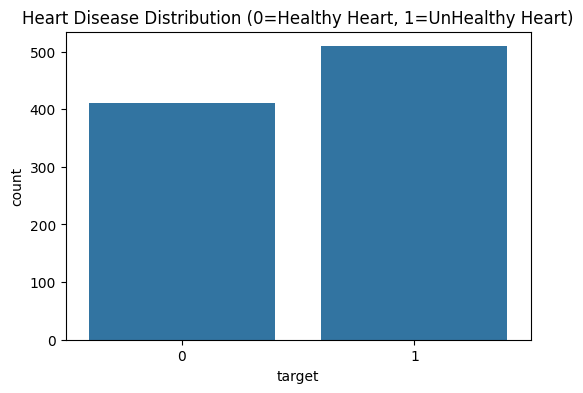

In [32]:
#outcome distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0=Healthy Heart, 1=UnHealthy Heart)')
plt.show()

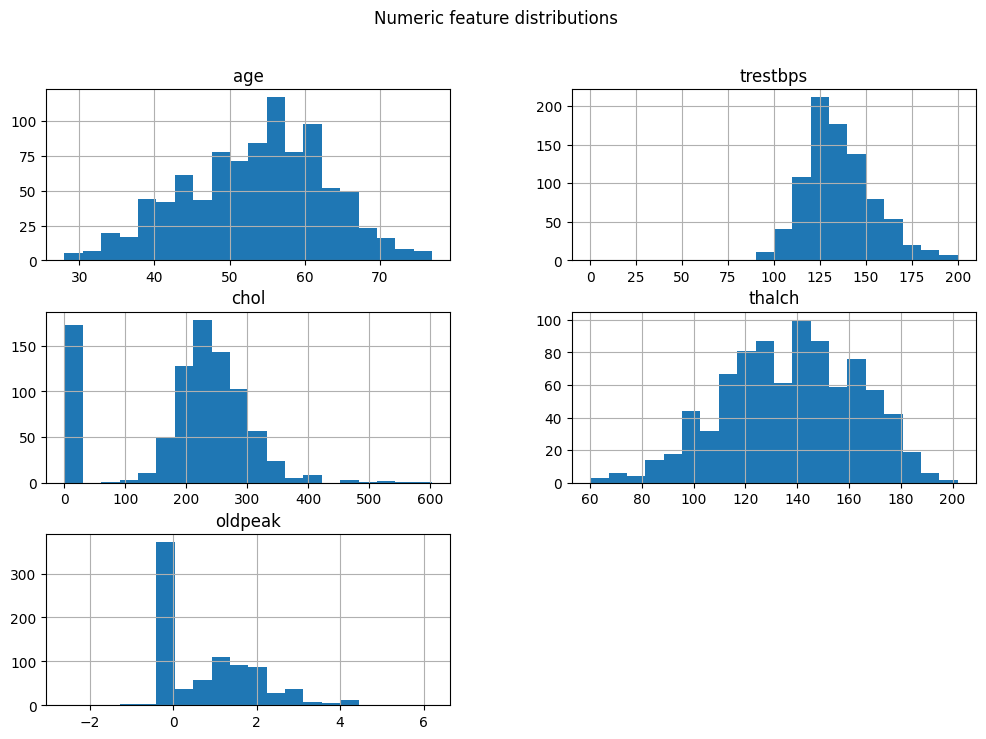

In [33]:
#numeric keys histograms
categorical_columns = ['sex','cp','fbs','restecg','exang','slope']
numerical_columns = [c for c in df.columns if c not in categorical_columns+['num']+['target']]
X[numerical_columns].hist(bins=20, figsize=(12,8))
plt.suptitle('Numeric feature distributions')
plt.show()

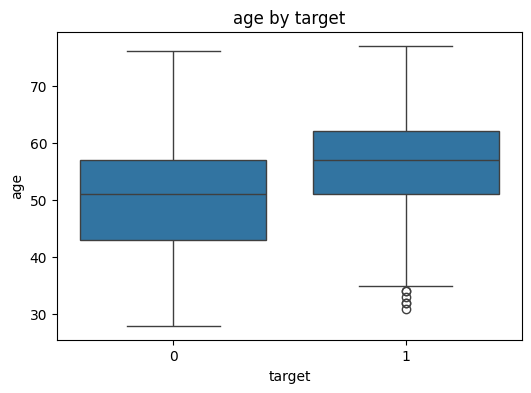

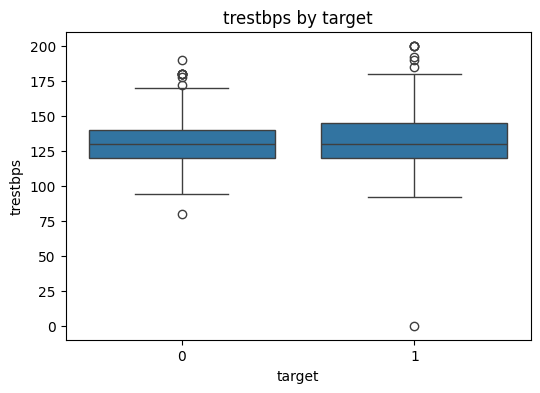

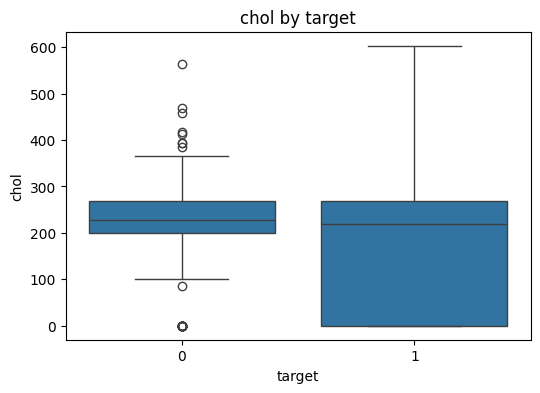

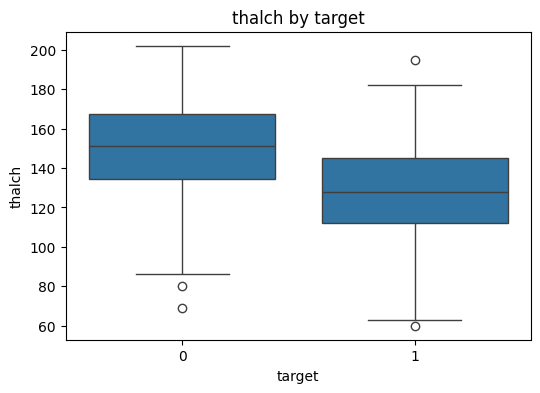

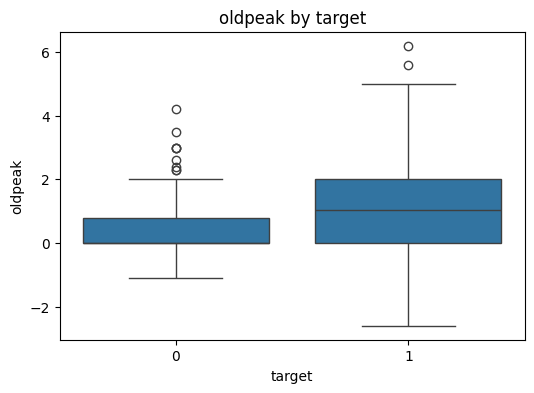

In [34]:
#continuous features vs target
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by target')
    plt.show()

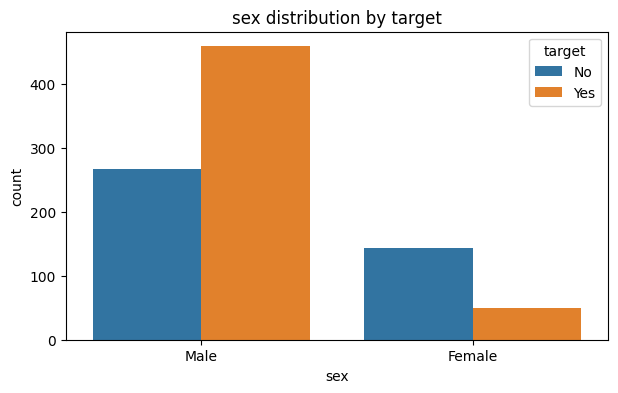

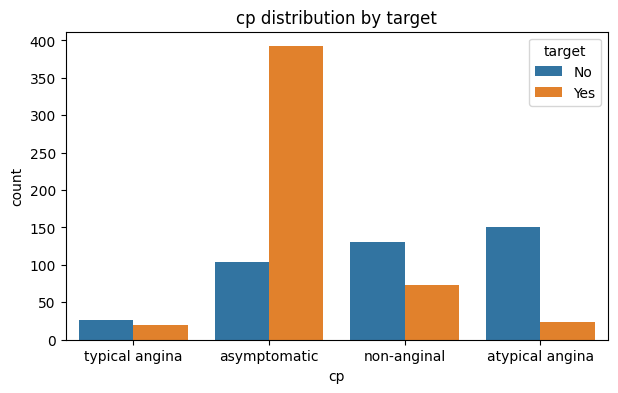

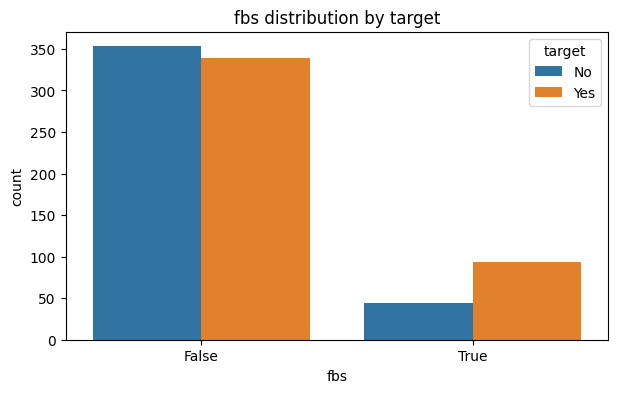

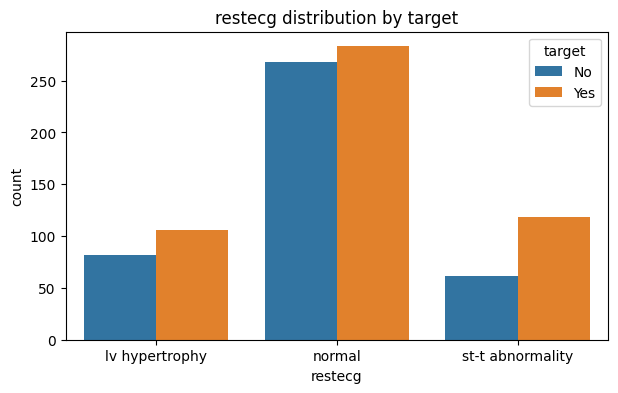

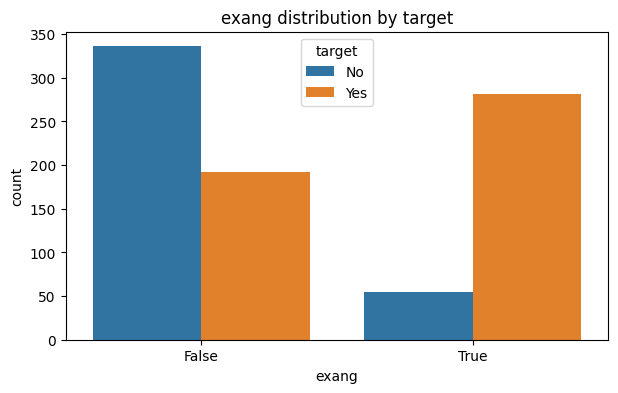

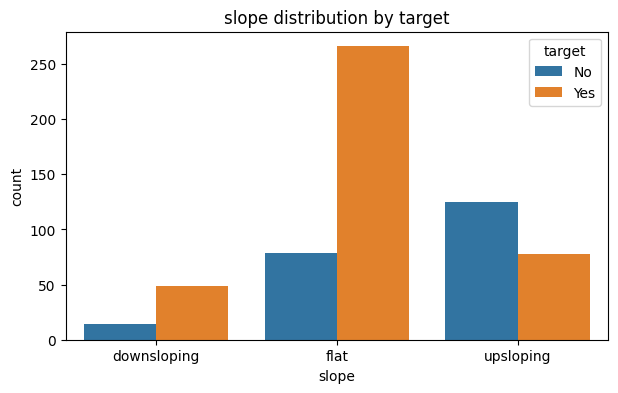

In [35]:
# 3.6 Categorical feature counts broken down by target
for col in categorical_columns:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} distribution by target')
    plt.legend(title='target', labels=['No', 'Yes'])
    plt.show()

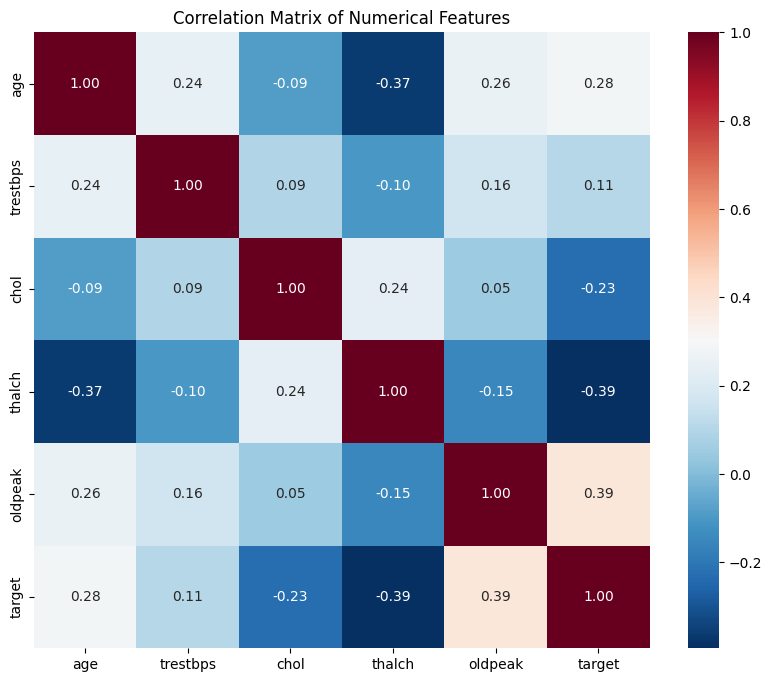

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='RdBu_r', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [37]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)


In [38]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        82
           1       0.80      0.88      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184




Classification report (test):
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        82
           1       0.80      0.88      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



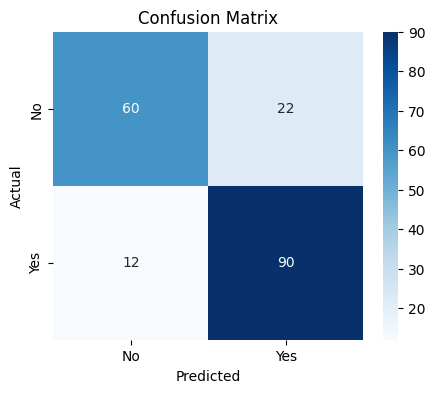

In [40]:
print("\nClassification report (test):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC (test):", roc_auc)


ROC-AUC (test): 0.9043519846963176


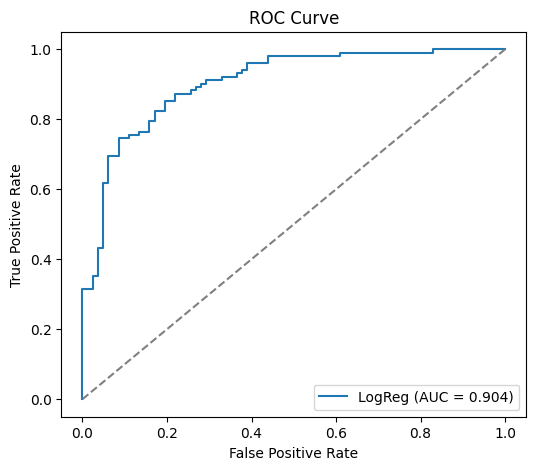

In [42]:
fpr, tpr, thr = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'LogReg (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

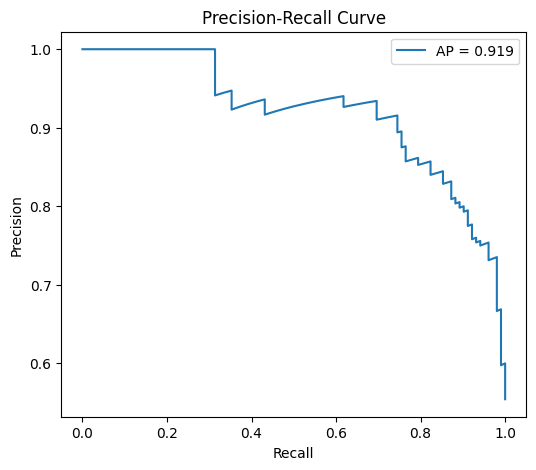

In [43]:
# Precision-Recall
ap = average_precision_score(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()